In [1]:
from models import DSTP, SSP, DMC, StandardDDM
from models import runsimulations, modelrecovery
import multiprocessing.pool as mpp
import sys
import json
import pandas as pd
import numpy as np
import numba as nb


In [ ]:
#DSTP
dstp = DSTP()
runsimulations.run_simulations([dstp], 1, 1, 'S1FlankerData.csv', return_dataframes=True)

init params:  [10.976270078546495, 0.7151893663724195, 1.2055267521432877, 5.448831829968968, 42.36547993389047, 3.2294705653332807]
sim data: 
      id  trial  accuracy        rt   congruency
0     0      1       1.0  5.829471    congruent
1     0      2       1.0  5.829471    congruent
2     0      3       1.0  5.879471    congruent
3     0      4       1.0  5.829471    congruent
4     0      5       1.0  5.879471    congruent
..   ..    ...       ...       ...          ...
295   0    296       1.0  6.129471  incongruent
296   0    297       1.0  6.179471  incongruent
297   0    298       1.0  6.029471  incongruent
298   0    299       1.0  6.129471  incongruent
299   0    300       1.0  6.079471  incongruent

[300 rows x 5 columns]
PARTICIPANT 0
run 1
1
temp q length:  87 i:  0
temp_q length:  0 i:  1
temp_q length:  45 i:  2
group cdf quantiles:  [5.779470565333272, 5.8294705653332715, 5.8294705653332715, 5.879470565333271, 5.929470565333271]
group caf cutoffs:  [5.8294705653332715

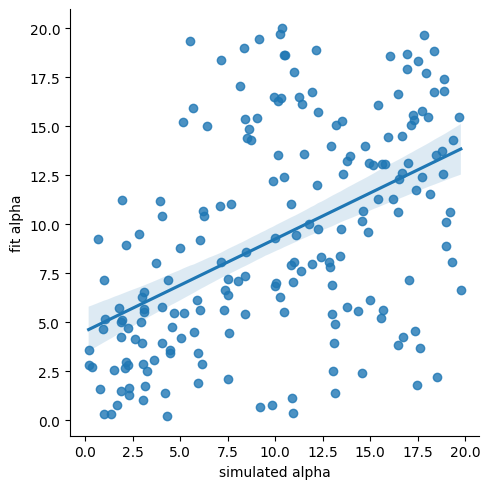

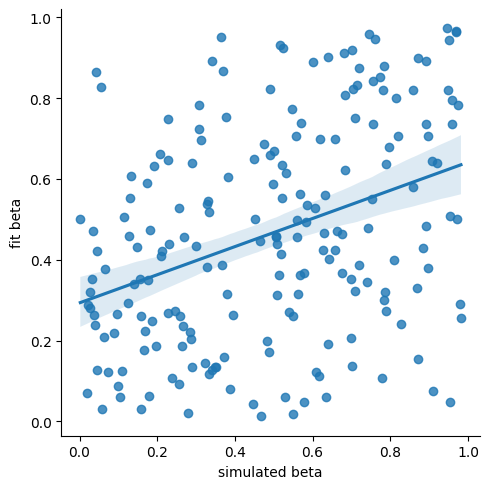

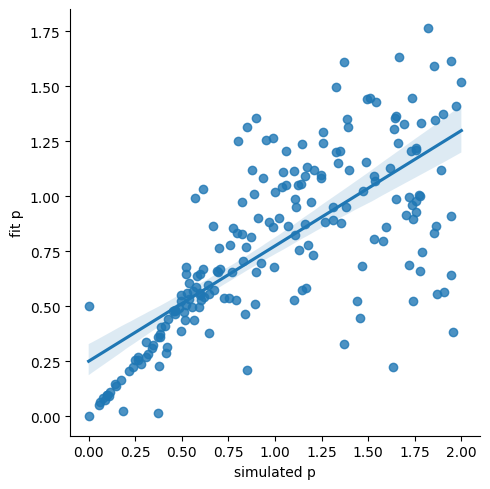

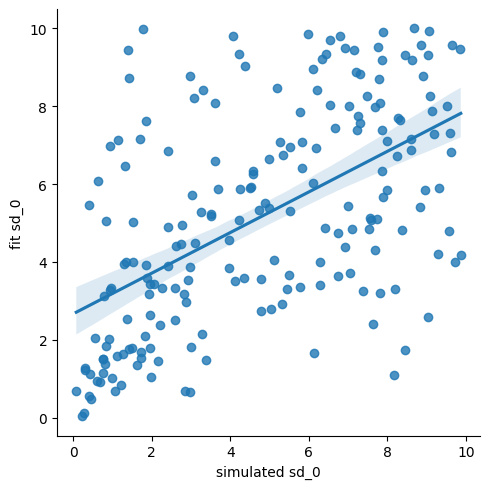

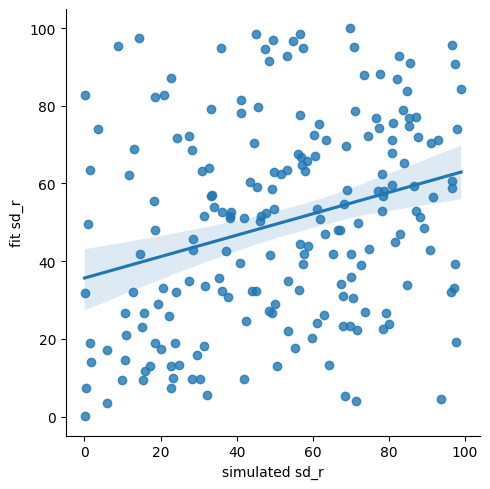

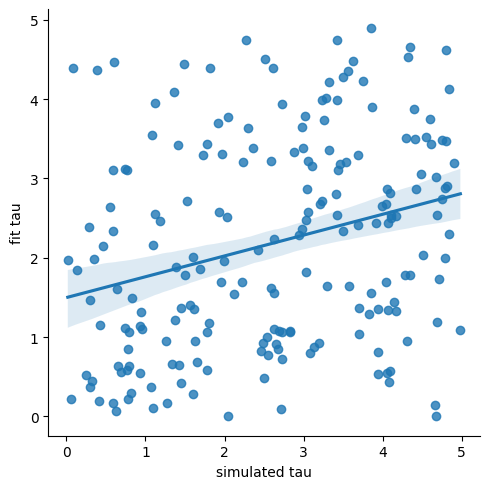

[0.48871910645717964, 0.36694725270853584, 0.7236165634683221, 0.552995709909601, 0.28655982280436043, 0.2820928441487507]
[2.1042313515237062e-13, 9.06650685224449e-08, 1.0207308814418459e-33, 2.0523524002783158e-17, 3.892468301445637e-05, 5.19035132232365e-05]


In [2]:
ssp = SSP()
modelrecovery.param_recovery([ssp])

In [ ]:
ssp = SSP()
dmc = DMC()
dstp = DSTP()
modelrecovery.model_recovery([ssp, dmc, dstp])